**Task 4:- Sales Prediction Using Python**

By **Vishwajit Singh**

August Batch 2 

Aim:- Build a model which predicts sales based on the money spent on different platforms for marketing.

Dataset info:- Given dataset consist of the advertising platform and the related sales. Dataset containing Sales Prediction data and this dataset is taken from Kaggle as mention in pdf.

Importing Image from Url by using necessary library:-

In [2]:
from IPython.display import Image
Image(url= "https://th.bing.com/th/id/OIP.Hc7wdge8I7onCfLfxu8FlAHaEH?pid=ImgDet&rs=1")

**Importing the Dependencies**

In [28]:
# Importing required libraries for analysis the dataset
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

**Reading and Understanding the Data**

In [29]:
Sales_dataset = pd.read_csv('G:/VS_Code/CODSOFT_Tasks/Sales_Prediction/advertising.csv')        # reading csv file by usnig pandas
Sales_dataset.head()       # by using head it reads first 5 rows of dataset 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [30]:
Sales_dataset.tail()       # by usnig tail it reads last 5 rows of dataset 

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [31]:
Sales_dataset.describe()      # Check the descriptive statistics of numeric variables

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
Sales_dataset.shape         # Check the number of rows and columns

(200, 4)

In [33]:
Sales_dataset.columns.values            # Check the columns attribute's name

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [34]:
Sales_dataset.dtypes      # Check the data type of columns of dataset

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [35]:
Sales_dataset.info(verbose = True)         # Display summary or information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [36]:
Sales_dataset['Sales'].value_counts()        #Check the value count of column 'Sales'

Sales
11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: count, Length: 121, dtype: int64

**Data Cleaning**

In [37]:
Sales_dataset.isnull().values.any()        # Check the any null values in dataset

False

In [38]:
Sales_dataset.isnull()          # Check the null values in dataset

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [39]:
# checking the number of missing values in each column
Sales_dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [40]:
Sales_dataset.isnull().sum()*100/Sales_dataset.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [41]:
100*Sales_dataset['Sales'].value_counts()/len(Sales_dataset['Sales']) 

Sales
11.9    2.5
16.7    2.5
20.7    2.0
11.0    1.5
11.3    1.5
       ... 
13.4    0.5
24.2    0.5
8.1     0.5
5.5     0.5
25.5    0.5
Name: count, Length: 121, dtype: float64

There is nothing to handle with missing values

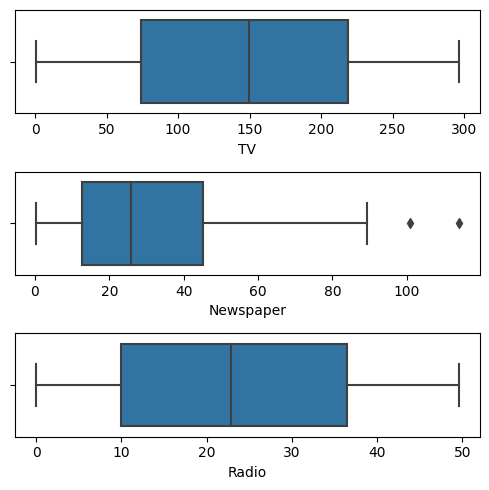

In [42]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x=Sales_dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(x=Sales_dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=Sales_dataset['Radio'], ax = axs[2])
plt.tight_layout()

**Basic Observation**

Average expense spend is highest on TV

Average expense spend is lowest on Radio

Max sale is 27 and min is 1.6

**Exploratory Data Analysis**

Univariate Analysis

Sales (Target Variable)

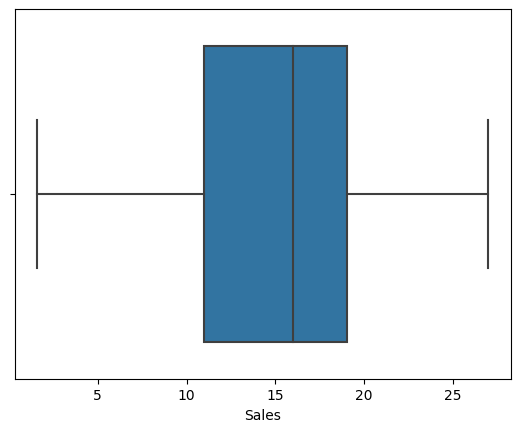

In [43]:
sns.boxplot(x=Sales_dataset['Sales'])
plt.show()

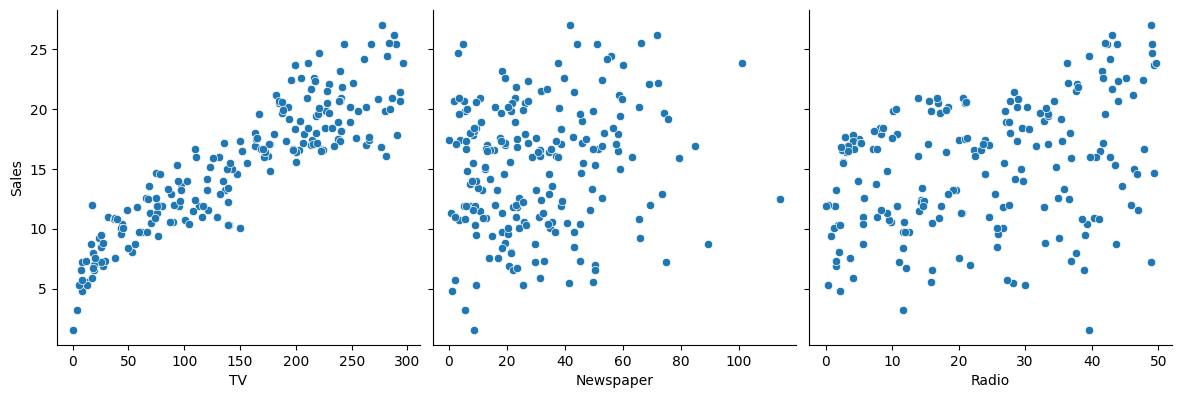

In [109]:

# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(Sales_dataset, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

**Pair Plot Observation**

When advertising cost increases in TV ADS the sales will increses as well. While the for newspaper and radio it is bit unpredictable.

Text(0.5, 1.0, 'Sales of TV')

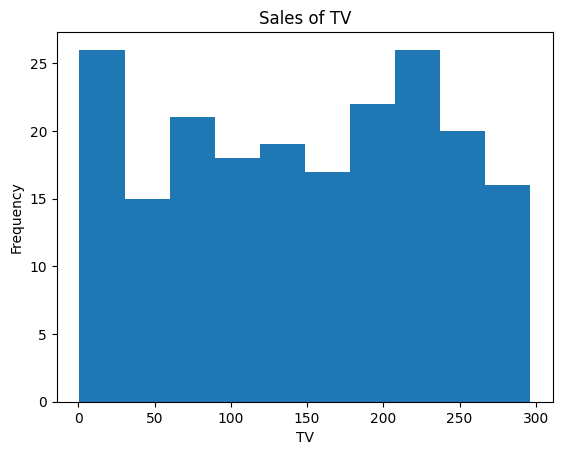

In [111]:
Sales_dataset["TV"].plot.hist(bins=10)
plt.xlabel("TV")
plt.title("Sales of TV")

Text(0.5, 1.0, 'Sales of Radio')

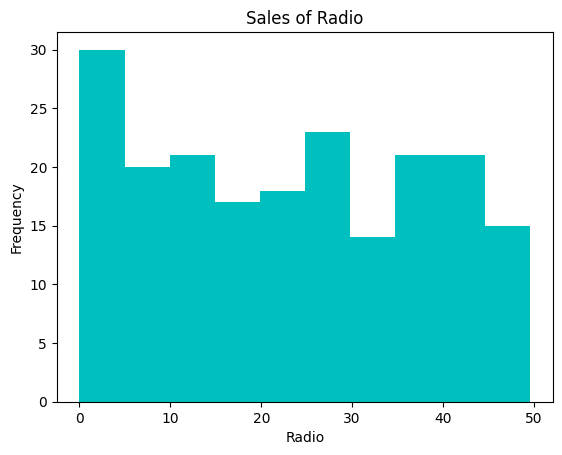

In [112]:
Sales_dataset["Radio"].plot.hist(bins=10, color = "c", xlabel = "Radio")
plt.title("Sales of Radio")

Text(0.5, 1.0, 'Sales of Newspaper')

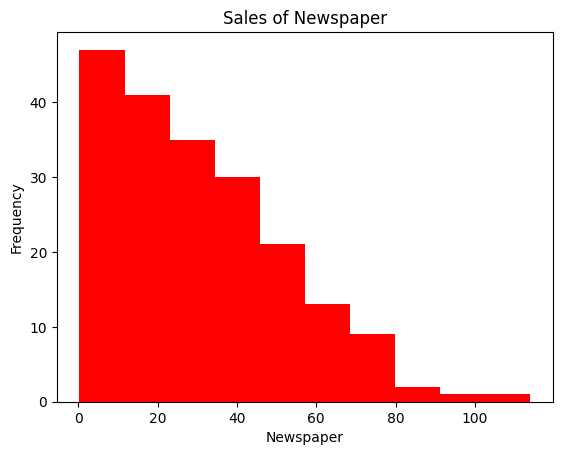

In [114]:
Sales_dataset["Newspaper"].plot.hist(bins=10,color='r',xlabel="Newspaper")
plt.title("Sales of Newspaper")

**Histrogram Observation**

The mainly sales isthe result of low advertising cost  in newspaper.

In [49]:
Sales_dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


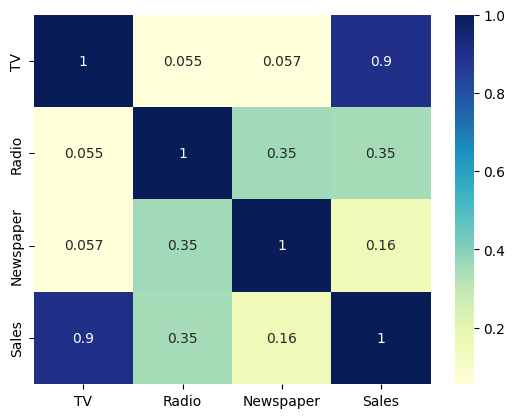

In [48]:
# Let's see the correlation between different variables.
sns.heatmap(Sales_dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

**Model Building**

Performing Simple Linear Regression

Equation of linear regression

y=c+m1x1+m2x2+...+mnxn

>> y is the response

>> c is the intercept

>> m1 is the coefficient for the first feature

>> mn is the coefficient for the nth feature
In our case:

y=c+m1×TV

The m values are called the model coefficients or model parameters.

Generic Steps in model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [95]:
X = Sales_dataset['TV']
y = Sales_dataset['Sales']

**Train-Test Split**

You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [97]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [98]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

**Building a Linear Model**

You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [99]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [100]:
print(X.shape, X_train.shape, X_test.shape)

(200,) (140,) (60,)


In [101]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [74]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [75]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        16:27:15   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

**Looking at some key statistics from the summary**

The values we are concerned with are -

1. The coefficients and significance (p-values)

2. R-squared

3. F statistic and its significance



--> **The coefficient for TV is 0.054, with a very low p value**

The coefficient is statistically significant. So the association is not purely by chance.

--> **R - squared is 0.816**

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

--> **F statistic has a very low p value (practically low)**

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

**Sales=6.948+0.054×TV**

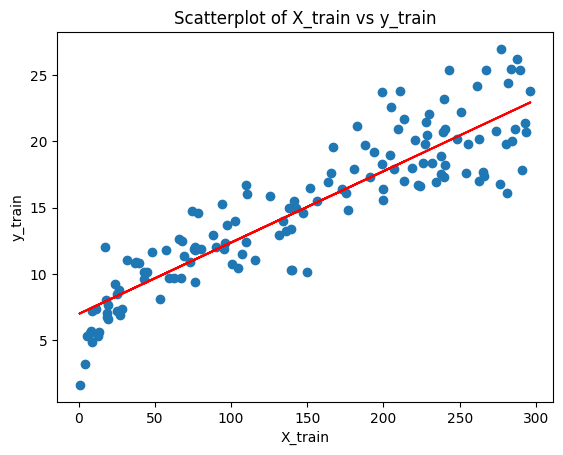

In [106]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Scatterplot of X_train vs y_train')
plt.show()

**Model Evaluation**

*Residual analysis*

To validate assumptions of the model, and hence the reliability for inference

**Distribution of the error terms**

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [77]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

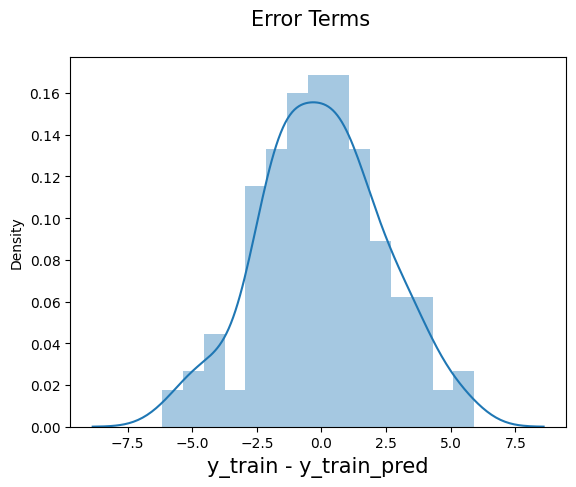

In [78]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

**Looking for patterns in the residuals**

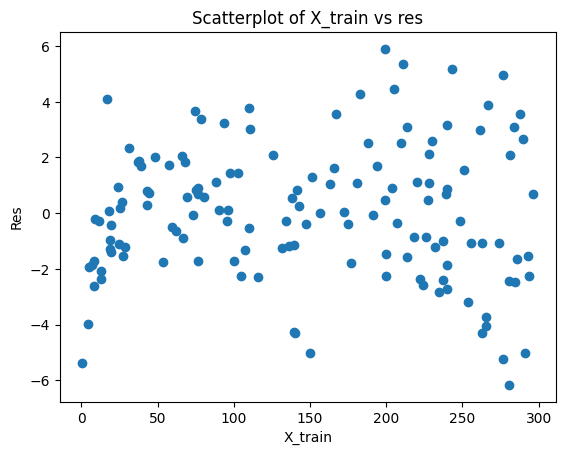

In [105]:
plt.scatter(X_train,res)
plt.xlabel('X_train')
plt.ylabel('Res')
plt.title('Scatterplot of X_train vs res')
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

**Predictions on the Test Set**

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [80]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [81]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Looking at the RMSE

In [83]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

**Checking the R-squared on the test set**

In [84]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

Visualizing the fit on the test set

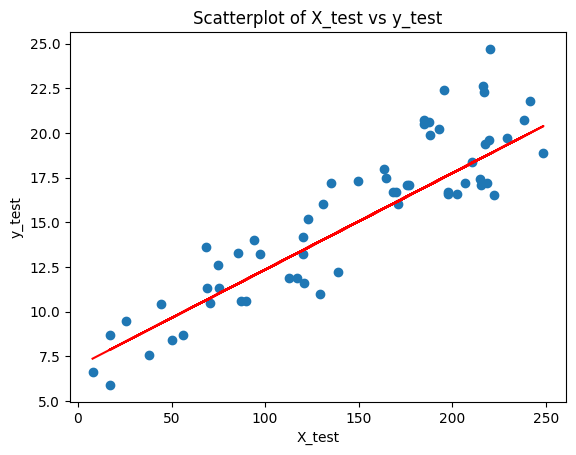

In [104]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.title('Scatterplot of X_test vs y_test')
plt.show()

Conclusion:- our model is successfully able to predict the sales using advertising platform datasets.

# Thank You